**Задание 1: Векторизация текста с использованием Мешка слов (BoW) и TF-IDF**

1. Создайте корпус из минимум 10 текстовых документов (можно взять новостные статьи, отзывы на товары, статьи по одной тематике).
2. Реализуйте предобработку текста, включающую:
* Приведение к нижнему регистру
* Токенизацию
* Удаление стоп-слов и пунктуации
* Лемматизацию/стемминг
3. Реализуйте модель Мешка слов (BoW) с использованием CountVectorizer из scikit-learn.
4. Реализуйте модель TF-IDF с использованием TfidfVectorizer из scikit-learn.
5. Найдите 10 самых значимых терминов для каждого документа по обоим подходам и сравните результаты.
6. Визуализируйте сходство документов с помощью метрики косинусного расстояния для обоих подходов.
7. Прокомментируйте разницу в результатах между BoW и TF-IDF

In [ ]:
# необходимые библиотеки
import re
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# загрузка документов
file_corpus = [
    "1_art.txt", "2_art.txt", "3_art.txt", "4_art.txt", "5_art.txt",
    "6_art.txt", "7_art.txt", "8_art.txt", "9_art.txt", "10_art.txt"
]

preprocessed_docs = []
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

for filename in file_corpus:
    with open(filename, 'r', encoding='utf-8') as file:
        text = file.read()
# предобработка текста
    # Приведение к нижнему регистру
    text = text.lower()
     # Удаление пунктуации и вообще всего
    text = re.sub(r'[^a-z\s]', '', text)
    # Токенизация
    tokens = word_tokenize(text)
    # Удаление стоп-слов и лемматизация
    lemmas = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    preprocessed_docs.append(" ".join(lemmas))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# необходимые библиотеки
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Создание векторизатора
count_vectorizer = CountVectorizer()

# Обучение векторизатора и преобразование документов
bow_matrix = count_vectorizer.fit_transform(preprocessed_docs)

# Получение списка фичей (слов)
feature_names = count_vectorizer.get_feature_names_out()

# Преобразование разреженной матрицы в плотную для наглядности
bow_df = pd.DataFrame(
    bow_matrix.toarray(),
    columns=feature_names,
    index=[f'Документ {i+1}' for i in range(len(preprocessed_docs))]
)

# Вывод матрицы Bag of Words
print("Матрица Bag of Words:")
print(bow_df)


Матрица Bag of Words:
             abanindranath  abbas  absolute  absorbed  abstract  accession  \
Документ 1               0      0         0         0         0          0   
Документ 2               2      1         0         0         0          2   
Документ 3               0      0         0         1         0          0   
Документ 4               0      0         0         0         0          0   
Документ 5               0      0         0         0         1          0   
Документ 6               0      0         1         0         0          0   
Документ 7               0      0         0         0         0          0   
Документ 8               0      0         0         0         2          0   
Документ 9               0      0         0         0         0          0   
Документ 10              0      0         0         0         0          0   

             acclaimed  accomplished  according  achievement  ...  yet  yuan  \
Документ 1           0             0   

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Создание TF-IDF векторизатора
tfidf_vectorizer = TfidfVectorizer()

# Обучение векторизатора и преобразование документов
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_docs)

# Преобразование в DataFrame
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out(),
    index=[f'Документ {i+1}' for i in range(len(preprocessed_docs))]
)

# Вывод матрицы TF-IDF
print("Матрица TF-IDF:")
print(tfidf_df)

Матрица TF-IDF:
             abanindranath     abbas  absolute  absorbed  abstract  accession  \
Документ 1        0.000000  0.000000  0.000000   0.00000  0.000000   0.000000   
Документ 2        0.045188  0.022594  0.000000   0.00000  0.000000   0.045188   
Документ 3        0.000000  0.000000  0.000000   0.05352  0.000000   0.000000   
Документ 4        0.000000  0.000000  0.000000   0.00000  0.000000   0.000000   
Документ 5        0.000000  0.000000  0.000000   0.00000  0.057794   0.000000   
Документ 6        0.000000  0.000000  0.023038   0.00000  0.000000   0.000000   
Документ 7        0.000000  0.000000  0.000000   0.00000  0.000000   0.000000   
Документ 8        0.000000  0.000000  0.000000   0.00000  0.098030   0.000000   
Документ 9        0.000000  0.000000  0.000000   0.00000  0.000000   0.000000   
Документ 10       0.000000  0.000000  0.000000   0.00000  0.000000   0.000000   

             acclaimed  accomplished  according  achievement  ...       yet  \
Документ 1   

In [ ]:
import numpy as np

bow_sum = np.sum(bow_matrix.toarray(), axis=0)

word_bow_dict = dict(zip(feature_names, bow_sum))

top_bow_words = sorted(word_bow_dict.items(), key=lambda x: x[1], reverse=True)[:10]

print("=== Топ-10 слов по всей коллекции ===\n")
print("Топ-10 слов по BOW (самые частые в коллекции):")
for word, count in top_bow_words:
    print(f"- {word}: {count} раз")

tfidf_sum = np.sum(tfidf_matrix.toarray(), axis=0)

word_tfidf_dict = dict(zip(feature_names, tfidf_sum))

top_tfidf_words = sorted(word_tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nТоп-10 слов по TF-IDF (с наибольшим весом по всей коллекции):")
for word, score in top_tfidf_words:
    print(f"- {word}: {score:.4f}")

# Показываем разницу между списками
print("\nСравнение топ-10 слов:")
bow_words = [word for word, _ in top_bow_words]
tfidf_words = [word for word, _ in top_tfidf_words]

common_words = set(bow_words) & set(tfidf_words)
bow_only = set(bow_words) - common_words
tfidf_only = set(tfidf_words) - common_words

if common_words:
    print(f"Общие слова в обоих топ-10: {', '.join(common_words)}")
if bow_only:
    print(f"Только в BOW топ-10: {', '.join(bow_only)}")
if tfidf_only:
    print(f"Только в TF-IDF топ-10: {', '.join(tfidf_only)}")

=== Топ-10 слов по всей коллекции ===

Топ-10 слов по BOW (самые частые в коллекции):
- color: 54 раз
- art: 53 раз
- asia: 47 раз
- cm: 44 раз
- line: 42 раз
- image: 39 раз
- century: 34 раз
- period: 27 раз
- also: 23 раз
- world: 23 раз

Топ-10 слов по TF-IDF (с наибольшим весом по всей коллекции):
- line: 0.9599
- color: 0.7941
- art: 0.7583
- asia: 0.6625
- cm: 0.5765
- shape: 0.5732
- bell: 0.4817
- yayoi: 0.4817
- symmetry: 0.4605
- video: 0.4466

Сравнение топ-10 слов:
Общие слова в обоих топ-10: cm, asia, color, art, line
Только в BOW топ-10: image, world, also, period, century
Только в TF-IDF топ-10: bell, shape, yayoi, symmetry, video


In [ ]:
def preprocess_text(text):
    """Функция для базовой обработки текста"""
    # Преобразуем в нижний регистр
    text = text.lower()

    # Удаляем пунктуацию (оставляем только буквы и пробелы)
    text = re.sub(r'[^\w\s]', '', text)

    # Токенизация (разбиение на слова)
    tokens = word_tokenize(text)

    return tokens

# Предобрабатываем каждое предложение в корпусе
processed_corpus = [preprocess_text(sentence) for sentence in file_corpus]

In [ ]:
!pip install gensim
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import numpy as np

model = Word2Vec(
    sentences=preprocessed_docs,  # Наш корпус предложений
    vector_size=100,  # Размерность векторов (обычно от 100 до 300)
    window=5,  # Размер контекстного окна (сколько слов слева и справа учитывать)
    min_count=1,  # Минимальная частота слова для включения в модель (здесь 1, т.к. у нас маленький корпус)
    sg=1,  # 1 = Skip-gram, 0 = CBOW
    hs=0,  # 0 = использовать negative sampling, 1 = иерархический softmax
    negative=5,  # Количество "негативных" семплов для negative sampling
    ns_exponent=0.75,  # Экспонента для отрицательного сэмплирования
    cbow_mean=1,  # Для CBOW: 1 = использовать среднее, 0 = сумму
    alpha=0.025,  # Начальная скорость обучения
    min_alpha=0.0001,  # Минимальная скорость обучения
    seed=42,  # Для воспроизводимости результатов
    workers=4,  # Количество потоков для параллельного обучения
)

# Начинаем обучение
print("Начало обучения Word2Vec модели...")
model.train(
    preprocessed_docs,
    total_examples=len(preprocessed_docs),
    epochs=100  # Количество эпох (проходов по всему корпусу)
)
print("Обучение завершено!")

# Сохраняем модель для будущего использования
model.save("simple_word2vec_model.model")
print("Модель сохранена в файл 'simple_word2vec_model.model'")

Начало обучения Word2Vec модели...
Обучение завершено!
Модель сохранена в файл 'simple_word2vec_model.model'


In [ ]:
def sentence_to_vector(sentence, model):
    words = preprocess_text(sentence)
    words = [word for word in words if word in model.wv]

    if not words:
        return np.zeros(model.vector_size)

    return np.mean([model.wv[word] for word in words], axis=0)

sentence_vectors = [
    sentence_to_vector(sentence, model)
    for sentence in preprocessed_docs
]

def find_similar_sentences(query, corpus, model, top_n=5):
    query_vector = sentence_to_vector(query, model)
    query_norm = np.linalg.norm(query_vector)

    if query_norm == 0:
        return []

    similarities = []

    for sentence, sent_vector in zip(corpus, sentence_vectors):
        denom = query_norm * np.linalg.norm(sent_vector)
        similarity = 0.0 if denom == 0 else float(
            np.dot(query_vector, sent_vector) / denom
        )
        similarities.append((sentence, similarity))

    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:top_n]

def sentence_to_vector(sentence, model):
    words = preprocess_text(sentence)
    words = [word for word in words if word in model.wv]

    if not words:
        return np.zeros(model.vector_size)

    return np.mean([model.wv[word] for word in words], axis=0)

sentence_vectors = [
    sentence_to_vector(sentence, model)
    for sentence in preprocessed_docs
]

def find_similar_sentences(query, corpus, model, top_n=10):
    query_vector = sentence_to_vector(query, model)
    query_norm = np.linalg.norm(query_vector)

    if query_norm == 0:
        return []

    similarities = []

    for sentence, sent_vector in zip(corpus, sentence_vectors):
        denom = query_norm * np.linalg.norm(sent_vector)
        similarity = 0.0 if denom == 0 else float(
            np.dot(query_vector, sent_vector) / denom
        )
        similarities.append((sentence, similarity))

    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:top_n]

for query in preprocessed_docs:
    print(f"\nЗапрос: {query[:50]}...")
    similar = find_similar_sentences(query, preprocessed_docs, model)

    for i, (sentence, score) in enumerate(similar, 1):
        print(f"{i}. {sentence[:50]} (сходство: {score:.4f})")


Запрос: brief history culture asia dr sonia coman historia...
1. brief history culture asia dr sonia coman historia (сходство: 1.0000)
2. balance symmetry emphasis dr asa simon mittman per (сходство: 0.9512)
3. early modern selffashioning transcultural encounte (сходство: 0.8967)
4. space dr asa simon mittman left raphael la donna v (сходство: 0.8192)
5. line basic visual element line used define shape f (сходство: 0.8147)
6. surface depth art institute chicago make painting  (сходство: 0.7269)
7. texture dr asa simon mittman texture feeling surfa (сходство: 0.6520)
8. color dr asa simon mittman hue colour visible ligh (сходство: 0.6419)
9. shape form dr asa simon mittman shape build line c (сходство: 0.5683)
10. yayoi period bce ce influential importation asian  (сходство: 0.4726)

Запрос: early modern selffashioning transcultural encounte...
1. early modern selffashioning transcultural encounte (сходство: 1.0000)
2. balance symmetry emphasis dr asa simon mittman per (сходство: 0.953

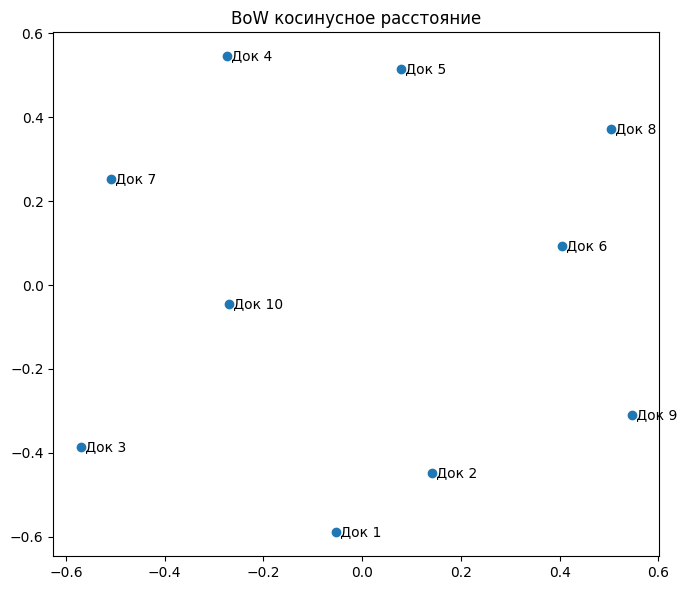

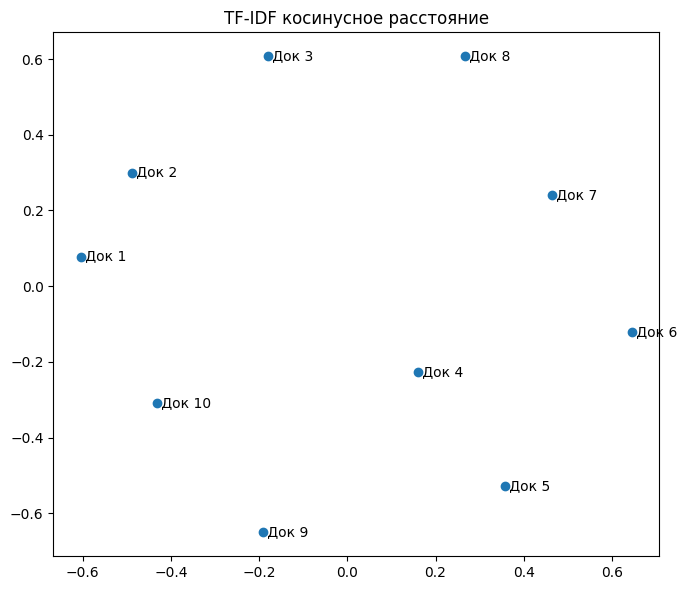

In [ ]:
docs_clean = [" ".join(preprocess_text(d)) for d in preprocessed_docs]
labels = [f"Док {i+1}" for i in range(len(docs_clean))]


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

bow = CountVectorizer()
X_bow = bow.fit_transform(docs_clean)

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(docs_clean)


from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_distances

def plot_mds(X, labels, title):
    D = cosine_distances(X)
    coords = MDS(n_components=2, dissimilarity="precomputed", random_state=42).fit_transform(D)

    plt.figure(figsize=(7,6))
    plt.scatter(coords[:,0], coords[:,1])
    for i, lab in enumerate(labels):
        plt.text(coords[i,0], coords[i,1], " " + lab, va="center")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_mds(X_bow, labels, "BoW косинусное расстояние")
plot_mds(X_tfidf, labels, "TF-IDF косинусное расстояние")

**Задание 2: Морфологическая разметка текста**

1. Возьмите отрывок текста (минимум 300 слов) на русском и английском языке.
2. Для русского языка используйте PyMorphy2 или PyMorphy3, для английского - NLTK или SpaCy для проведения морфологического анализа.
3. Выполните следующие операции:
* Определите части речи для каждого слова в тексте
* Для существительных определите падеж, род и число
* Для глаголов определите время, лицо и число
* Создайте частотный словарь частей речи в тексте
4. Разработайте функцию, которая будет автоматически изменять текст, заменяя все существительные на их форму множественного числа (где возможно).
5. Результаты морфологического анализа должны быть представлены в виде таблицы.
6. Оцените и прокомментируйте точность определения морфологических характеристик

In [ ]:
english_text = """I’d never given much thought to how I would die — though I’d had reason enough in the last few months — but even if I had, I would not have imagined it like this. I stared without breathing across the long room, into the dark eyes of the hunter, and he looked pleasantly back at me. Surely it was a good way to die, in the place of someone else, someone I loved. Noble, even. That ought to count for something. I knew that if I’d never gone to Forks, I wouldn’t be facing death now. But, terrified as I was, I couldn’t bring myself to regret the decision. When life offers you a dream so far beyond any of your expectations, it’s not reasonable to grieve when it comes to an end. The hunter smiled in a friendly way as he sauntered forward to kill me. Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, ‘and what is the use of a book,’ thought Alice ‘without pictures or conversation?’ So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her. There was nothing so very remarkable in that; nor did Alice think it so very much out of the way to hear the Rabbit say to itself, ‘Oh dear! Oh dear! I shall be late!’ (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually took a watch out of its waistcoat-pocket, and looked at it, and then hurried on, Alice started to her feet, for it flashed across her mind that she had never before seen a rabbit with either a waistcoat-pocket, or a watch to take out of it, and burning with curiosity, she ran across the field after it, and fortunately was just in time to see it pop down a large rabbit-hole under the hedge. In another moment down went Alice after it, never once considering how in the world she was to get out again."""
russian_text = """Я никогда не задумывалась о том, как я умру — хотя за последние несколько месяцев у меня было достаточно поводов, — но даже если бы и задумывалась, то не так бы себе это представляла. Я, не дыша, смотрела через всю длинную комнату в темные глаза охотника, а он приятно смотрел на меня в ответ. Конечно, это был хороший способ умереть — на месте кого-то другого, того, кого я любила. Даже благородный (способ). Это должно было что-то значить. Я знала, что если бы я никогда не поехала в Форкс, то сейчас мне не грозила бы смерть. Но, как бы я ни была напугана, я не могла заставить себя пожалеть о принятом решении. Когда жизнь дарит тебе мечту, превосходящую все твои ожидания, не стоит огорчаться, когда она заканчивается. Охотник приветливо улыбался, медленно идя вперед, чтобы убить меня. Алисе начинало надоедать сидеть рядом с сестрой на берегу и ничего не делать: раз или два она заглядывала в книгу, которую читала сестра, но в ней не было ни картинок, ни разговоров, «а что толку от книги, — думала Алиса, — без картинок и разговоров?». И вот она раздумывала (как могла, потому что жаркий день сделал ее очень сонной и глупой), стоит ли удовольствие сделать цепочку из маргариток, чтобы вставать и собирать их, как вдруг рядом с ней пробежал Белый Кролик с розовыми глазами. В этом не было ничего примечательного; Алиса также не подумала, что это так уж необычно, когда услышала, как Кролик сказал себе: «О боже! О боже! Я опоздаю!» (потом, когда она обдумала это, ей пришло в голову, что она должна была удивиться этому, но в то время все это казалось вполне естественным); Алиса вскочила на ноги, потому что ей пришло в голову, что она никогда раньше не видела кролика ни с жилетным карманом, ни с часами, которые можно было бы из него достать, и, сгорая от любопытства, она побежала по полю вслед за ним, и, к счастью, как раз вовремя, чтобы увидеть, как он спускается в большую кроличью нору под живой изгородью. Еще через мгновение Алиса спустилась за ним, ни разу не задумавшись о том, как ей выбраться обратно."""

!pip install nltk spacy pymorphy3
!pip install inflect

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter
from nltk.tokenize.treebank import TreebankWordDetokenizer
import nltk
import string
import pymorphy3
import inflect

nltk.download('universal_tagset')
nltk.download('averaged_perceptron_tagger_eng')

import spacy
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

text_tok = word_tokenize(english_text)
tagged = nltk.pos_tag(text_tok)
list_of_tagged = []

for elem in tagged:
    tag_tog = '_'.join(elem)
    list_of_tagged.append(tag_tog)

print(list_of_tagged)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 68.2 MB/s eta 0:00:00


[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


['I_PRP', '’_VBP', 'd_JJ', 'never_RB', 'given_VBN', 'much_RB', 'thought_VBN', 'to_TO', 'how_WRB', 'I_PRP', 'would_MD', 'die_VB', '—_NNP', 'though_IN', 'I_PRP', '’_VBP', 'd_NN', 'had_VBD', 'reason_NN', 'enough_RB', 'in_IN', 'the_DT', 'last_JJ', 'few_JJ', 'months_NNS', '—_VBP', 'but_CC', 'even_RB', 'if_IN', 'I_PRP', 'had_VBD', ',_,', 'I_PRP', 'would_MD', 'not_RB', 'have_VB', 'imagined_VBN', 'it_PRP', 'like_IN', 'this_DT', '._.', 'I_PRP', 'stared_VBD', 'without_IN', 'breathing_VBG', 'across_IN', 'the_DT', 'long_JJ', 'room_NN', ',_,', 'into_IN', 'the_DT', 'dark_JJ', 'eyes_NNS', 'of_IN', 'the_DT', 'hunter_NN', ',_,', 'and_CC', 'he_PRP', 'looked_VBD', 'pleasantly_RB', 'back_RB', 'at_IN', 'me_PRP', '._.', 'Surely_RB', 'it_PRP', 'was_VBD', 'a_DT', 'good_JJ', 'way_NN', 'to_TO', 'die_VB', ',_,', 'in_IN', 'the_DT', 'place_NN', 'of_IN', 'someone_NN', 'else_RB', ',_,', 'someone_NN', 'I_PRP', 'loved_VBD', '._.', 'Noble_JJ', ',_,', 'even_RB', '._.', 'That_DT', 'ought_MD', 'to_TO', 'count_VB', 'for_IN

In [ ]:
morph = pymorphy3.MorphAnalyzer()
text_tok = word_tokenize(russian_text)
rus_list_of_tagged = []

for word in text_tok:
    parses = morph.parse(word)
    best_parse = parses[0]
    pos = best_parse.tag.POS
    _case = best_parse.tag.case
    gender = best_parse.tag.gender
    number = best_parse.tag.number
    person = best_parse.tag.person
    tense = best_parse.tag.tense
    if pos == 'NOUN':
        rus_list_of_tagged.append(f'{word}_{pos}_{_case}_{gender}_{number}')
    elif pos == 'VERB':
        rus_list_of_tagged.append(f'{word}_{pos}_{person}_{tense}_{number}')
    else:
        rus_list_of_tagged.append(f'{word}_{pos}')

print(rus_list_of_tagged)

['Я_NPRO', 'никогда_ADVB', 'не_PRCL', 'задумывалась_VERB_None_past_sing', 'о_PREP', 'том_ADJF', ',_None', 'как_CONJ', 'я_NPRO', 'умру_VERB_1per_futr_sing', '—_None', 'хотя_CONJ', 'за_PREP', 'последние_ADJF', 'несколько_ADVB', 'месяцев_NOUN_gent_masc_plur', 'у_PREP', 'меня_NPRO', 'было_VERB_None_past_sing', 'достаточно_ADVB', 'поводов_NOUN_gent_masc_plur', ',_None', '—_None', 'но_CONJ', 'даже_PRCL', 'если_CONJ', 'бы_PRCL', 'и_CONJ', 'задумывалась_VERB_None_past_sing', ',_None', 'то_CONJ', 'не_PRCL', 'так_CONJ', 'бы_PRCL', 'себе_NPRO', 'это_PRCL', 'представляла_VERB_None_past_sing', '._None', 'Я_NPRO', ',_None', 'не_PRCL', 'дыша_GRND', ',_None', 'смотрела_VERB_None_past_sing', 'через_PREP', 'всю_ADJF', 'длинную_ADJF', 'комнату_NOUN_accs_femn_sing', 'в_PREP', 'темные_ADJF', 'глаза_NOUN_accs_masc_plur', 'охотника_NOUN_gent_masc_sing', ',_None', 'а_CONJ', 'он_NPRO', 'приятно_ADVB', 'смотрел_VERB_None_past_sing', 'на_PREP', 'меня_NPRO', 'в_PREP', 'ответ_NOUN_accs_masc_sing', '._None', 'Конеч

In [ ]:
tokens = word_tokenize(english_text)
tokens = [t for t in tokens if re.search(r"[A-Za-z0-9]", t)]
tagged = pos_tag(tokens)
pos_counts = Counter(tag for _, tag in tagged)

print(pos_counts.most_common())

[('NN', 139), ('IN', 99), ('DT', 94), ('NNP', 73), ('JJ', 61), ('PRP', 53), ('NNS', 50), ('VB', 41), ('CC', 38), ('TO', 38), ('CD', 31), ('VBP', 30), ('VBZ', 29), ('RB', 28), ('VBD', 21), ('VBG', 19), ('VBN', 17), ('PRP$', 14), ('MD', 7), ('JJR', 7), ('WDT', 6), ('WRB', 4), ('RP', 3), ('EX', 2), ('WP', 2), ('RBR', 1), ('RBS', 1), ('PDT', 1), ('JJS', 1)]

pos_counts = Counter()

for word in text_tok:

    if all(not ch.isalnum() and ch not in "ёЁ" for ch in word):
        continue
    parse = morph.parse(word)[0]
    pos = parse.tag.POS or "UNKN"
    pos_counts[pos] += 1

print(pos_counts.most_common())

[('IN', 62), ('NN', 47), ('PRP', 44), ('DT', 42), ('RB', 37), ('VBD', 34), ('JJ', 22), ('VB', 20), ('CC', 19), ('TO', 18), ('VBG', 12), ('NNP', 11), ('NNS', 10), ('PRP$', 10), ('VBP', 8), ('VBN', 7), ('WRB', 7), ('MD', 7), ('RP', 4), ('VBZ', 3), ('WP', 1), ('EX', 1)]
[('NOUN', 55), ('CONJ', 47), ('VERB', 45), ('NPRO', 39), ('PREP', 39), ('PRCL', 37), ('ADVB', 27), ('ADJF', 26), ('INFN', 16), ('GRND', 4), ('ADJS', 2), ('PRTS', 1), ('PRTF', 1), ('NUMR', 1), ('COMP', 1), ('PRED', 1)]


In [ ]:
p = inflect.engine()
nlp = spacy.load("en_core_web_sm")

def pluralize_nouns_spacy(text: str) -> str:
    doc = nlp(text)
    out = []

    for tok in doc:
        if tok.tag_ in ("NN", "NNP"):
            pl = p.plural_noun(tok.text) or p.plural(tok.text)

            if tok.text.isupper():
                pl = pl.upper()
            elif tok.text.istitle():
                pl = pl.title()

            out.append(pl + tok.whitespace_)
        else:
            out.append(tok.text_with_ws)

    return "".join(out)

print(pluralize_nouns_spacy(english_text))


I’d never given much thoughts to how I would die — though I’d had reasons enough in the last few months — but even if I had, I would not have imagined it like this. I stared without breathing across the long rooms, into the dark eyes of the hunters, and he looked pleasantly back at me. Surely it was a good ways to die, in the places of someones else, someones I loved. Noble, even. That ought to count for somethings. I knew that if I’d never gone to Forkss, I wouldn’t be facing deaths now. But, terrified as I was, I couldn’t bring myself to regret the decisions. When lives offers you a dreams so far beyond any of your expectations, it’s not reasonable to grieve when it comes to an ends. The hunters smiled in a friendly ways as he sauntered forward to kill me. Alices was beginning to get very tired of sitting by her sisters on the banks, and of having nothings to do: once or twice she had peeped into the books her sisters was reading, but it had no pictures or conversations in it, ‘and w

In [ ]:
detok = TreebankWordDetokenizer()
def pluralize_nouns_pymorphy() -> str:

    tokens = word_tokenize(russian_text)
    new_tokens = []

    for w in tokens:
        if any(ch.isalpha() for ch in w):
            p = morph.parse(w)[0]
            if p.tag.POS == "NOUN" and p.tag.number == "sing":
                gramm = {"plur"}
                if p.tag.case:
                    gramm.add(p.tag.case)
                if p.tag.animacy:
                    gramm.add(p.tag.animacy)

                inf = p.inflect(gramm)
                if inf:
                    w = inf.word
        new_tokens.append(w)
    return new_tokens

new_text = detok.detokenize(pluralize_nouns_pymorphy())
print(new_text)

Я никогда не задумывалась о том, как я умру — хотя за последние несколько месяцев у меня было достаточно поводов, — но даже если бы и задумывалась, то не так бы себе это представляла . Я, не дыша, смотрела через всю длинную комнаты в темные глаза охотников, а он приятно смотрел на меня в ответы . Конечно, это был хороший способы умереть — на местах кого-то другого, того, кого я любила . Даже благородный (способы). Это должно было что-то значить . Я знала, что если бы я никогда не поехала в форксы, то сейчас мне не грозила бы смерти . Но, как бы я ни была напугана, я не могла заставить себя пожалеть о принятом решениях . Когда жизни дарит тебе мечты, превосходящую все твои ожиданий, не стоит огорчаться, когда она заканчивается . охотники приветливо улыбался, медленно идя вперед, чтобы убить меня . алисам начинало надоедать сидеть рядом с сёстрами на берегах и ничего не делать: раз или два она заглядывала в книги, которую читала сёстры, но в ней не было ни картинок, ни разговоров, « а чт

In [ ]:
eng_tokens = word_tokenize(english_text)
eng_tagged = nltk.pos_tag(eng_tokens)  # список (token, tag)

eng_df = pd.DataFrame(eng_tagged, columns=["token", "pos_tag"])


# Таблица разметки RUS
morph = pymorphy3.MorphAnalyzer()
rus_tokens = word_tokenize(russian_text)

rus_rows = []
for word in rus_tokens:
    if all(not ch.isalnum() and ch not in "ёЁ" for ch in word):
        continue

    p = morph.parse(word)[0]
    pos = p.tag.POS or "UNKN"

    row = {
        "token": word,
        "pos_tag": pos,
        "case": p.tag.case,
        "gender": p.tag.gender,
        "number": p.tag.number,
        "person": p.tag.person,
        "tense": p.tag.tense,
    }
    rus_rows.append(row)

rus_df = pd.DataFrame(rus_rows)



# 3) Таблицы частот POS
eng_tokens_np = [t for t in word_tokenize(english_text) if re.search(r"[A-Za-z0-9]", t)]
eng_pos_counts = Counter(tag for _, tag in pos_tag(eng_tokens_np))
eng_freq_df = pd.DataFrame(eng_pos_counts.most_common(), columns=["pos_tag", "count"])

rus_pos_counts = Counter()
for word in rus_tokens:
    if all(not ch.isalnum() and ch not in "ёЁ" for ch in word):
        continue
    pos = morph.parse(word)[0].tag.POS or "UNKN"
    rus_pos_counts[pos] += 1

rus_freq_df = pd.DataFrame(rus_pos_counts.most_common(), columns=["pos_tag", "count"])


# Таблицы
print("ENG tagged table:")
print(eng_df)

print("\nRUS tagged table:")
print(rus_df)

print("\nENG POS frequency:")
print(eng_freq_df)

print("\nRUS POS frequency:")
print(rus_freq_df)

ENG tagged table:
     token pos_tag
0        I     PRP
1        ’     VBP
2        d      JJ
3    never      RB
4    given     VBN
..     ...     ...
487     to      TO
488    get      VB
489    out      RP
490  again      RB
491      .       .

[492 rows x 2 columns]

RUS tagged table:
            token pos_tag  case gender number person tense
0               Я    NPRO  nomn   None   sing   1per  None
1         никогда    ADVB  None   None   None   None  None
2              не    PRCL  None   None   None   None  None
3    задумывалась    VERB  None   femn   sing   None  past
4               о    PREP  None   None   None   None  None
..            ...     ...   ...    ...    ...    ...   ...
337           том    ADJF  loct   neut   sing   None  None
338           как    CONJ  None   None   None   None  None
339            ей    NPRO  datv   femn   sing   3per  None
340     выбраться    INFN  None   None   None   None  None
341       обратно    ADVB  None   None   None   None  None

[3

**Задание 3: Синтаксический анализ предложений**

1. Возьмите 2 простых и 3 сложных предложений на русском и английском языке (всего 10 предложений).
2. Используйте SpaCy для построения синтаксических деревьев этих предложений.
3. Для каждого предложения:
* Визуализируйте синтаксическое дерево
* Выделите все подлежащие и сказуемые
* Найдите все пары слов, связанные отношением определения (прилагательное-существительное)
4. Разработайте функцию для извлечения всех объектных и субъектных отношений из предложения в формате (субъект, предикат, объект).
5. Объясните, какие трудности возникают при синтаксическом анализе сложных предложений

In [1]:
import spacy

!python -m spacy download ru_core_news_md
!python -m spacy download en_core_web_md

from spacy import displacy

nlp_ru = spacy.load("ru_core_news_md")
nlp_en = spacy.load("en_core_web_md")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 112.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 52.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [11]:
english_sentences = [
    "The boy reads an intresting book.",
    "The dog runs quickly.",
    "When the night came, the city fell into silence.",
    "I know that you will come tomorrow.",
    "The house that Jack built stands on the hill."
]

russian_sentences = [
    "Мальчик читает интересную книгу.",
    "Собака быстро бежит.",
    "Когда наступила ночь, город погрузился в тишину.",
    "Я знаю, что ты придёшь завтра.",
    "Дом, который построил Джек, стоит на холме."
]

In [12]:
for sentence in russian_sentences:
    doc_ru = nlp_ru(sentence)

    print(f"Sentence {russian_sentences.index(sentence)}")
    displacy.render(doc_ru, style="dep", jupyter=True, options={"distance": 100, "compact": True})

Sentence 0


Sentence 1


Sentence 2


Sentence 3


Sentence 4


In [13]:
for sentence in english_sentences:
    doc_en = nlp_en(sentence)

    print(f"Sentence {english_sentences.index(sentence)}")
    displacy.render(doc_en, style="dep", jupyter=True, options={"distance": 100, "compact": True})

Sentence 0


Sentence 1


Sentence 2


Sentence 3


Sentence 4


In [14]:
for sentence in english_sentences:
    doc_en = nlp_en(sentence)

    print(f"Sentence {english_sentences.index(sentence)}")
    displacy.render(doc_en, style="dep", jupyter=True, options={"distance": 100, "compact": True})

Sentence 0


Sentence 1


Sentence 2


Sentence 3


Sentence 4


In [15]:
def find_subj_and_pred_eng(doc):
    subj = []
    pred_tokens = []
    root = None

    # Находим корень
    for token in doc:
        if token.dep_ == "ROOT":
            root = token
            pred_tokens.append(token)
            break

    if not root:
        return [], []

    # Находим все компоненты составного сказуемого
    for token in doc:
        if token.dep_ in ["aux", "auxpass"] and token.head in [root] + [t for t in pred_tokens]:
            pred_tokens.append(token)

    # Составляем сказуемое в правильном порядке
    pred = [doc[i].text for i in sorted([t.i for t in pred_tokens])]

    # Ищем подлежащее где угодно в предложении
    for token in doc:
        if token.dep_ in ["nsubj", "nsubjpass"]:
            # Проверяем, является ли это подлежащим по отношению к ROOT или его компонентам
            current = token
            while current.head != current:  # Поднимаемся по дереву до корня
                if current.head in pred_tokens or current.head == root:
                    # Нашли подлежащее, связанное с нашим сказуемым
                    subj.append(token.text)
                    break
                current = current.head

    # Если все равно не нашли подлежащее - ищем более агрессивно
    if not subj:
        for token in doc:
            if token.dep_ in ["nsubj", "nsubj:pass"]:
                subj.append(token.text)

    return subj, pred


print("English sentences")
for text in english_sentences:
    doc = nlp_en(text)
    subject, predicate = find_subj_and_pred_eng(doc)
    print(f"Предложение: {text}")
    print(f"Подлежащее: {subject}, Сказуемое: {predicate}")
    print()

English sentences
Предложение: The boy reads an intresting book.
Подлежащее: ['boy'], Сказуемое: ['reads']

Предложение: The dog runs quickly.
Подлежащее: ['dog'], Сказуемое: ['runs']

Предложение: When the night came, the city fell into silence.
Подлежащее: ['night', 'city'], Сказуемое: ['fell']

Предложение: I know that you will come tomorrow.
Подлежащее: ['I', 'you'], Сказуемое: ['know']

Предложение: The house that Jack built stands on the hill.
Подлежащее: ['house', 'Jack'], Сказуемое: ['stands']



In [16]:
def find_subj_pred_rus(doc):
    root = None
    pred_tokens = []

    for token in doc:
        if token.dep_ == "ROOT":
            root = token
            pred_tokens.append(token)
            break

    if not root:
        return [], []

    changed = True
    while changed:
        changed = False
        for t in doc:
            if t.dep_ == "conj" and t.head in pred_tokens and t.pos_ in {"VERB", "AUX"}:
                if t not in pred_tokens:
                    pred_tokens.append(t)
                    changed = True

    def pred_text(p):
        parts = {p}
        for ch in p.children:
            if ch.dep_ in {"aux", "auxpass", "cop", "neg"}:
                parts.add(ch)
            if ch.dep_ == "xcomp" and ch.pos_ in {"VERB", "AUX"}:
                parts.add(ch)
        return " ".join(tok.text for tok in sorted(parts, key=lambda x: x.i))

    def subjects(p):
        subs = [ch for ch in p.children if ch.dep_ in {"nsubj", "nsubjpass", "nsubj:pass"}]
        if subs:
            return subs
        if p.dep_ == "conj":
            return subjects(p.head)
        return []

    all_subj = []
    all_pred = []
    for p in sorted(pred_tokens, key=lambda x: x.i):
        all_pred.append(pred_text(p))
        all_subj.extend([s.text for s in subjects(p)])

    return all_subj, all_pred


print("Russian sentences")
for text in russian_sentences:
    doc = nlp_ru(text)
    subject, predicate = find_subj_pred_rus(doc)
    print(f"Предложение: {text}")
    print(f"Подлежащее: {subject}, Сказуемое: {predicate}")
    print()

Russian sentences
Предложение: Мальчик читает интересную книгу.
Подлежащее: ['Мальчик'], Сказуемое: ['читает']

Предложение: Собака быстро бежит.
Подлежащее: ['Собака'], Сказуемое: ['бежит']

Предложение: Когда наступила ночь, город погрузился в тишину.
Подлежащее: ['город'], Сказуемое: ['погрузился']

Предложение: Я знаю, что ты придёшь завтра.
Подлежащее: ['Я'], Сказуемое: ['знаю']

Предложение: Дом, который построил Джек, стоит на холме.
Подлежащее: ['Дом'], Сказуемое: ['стоит']



In [17]:
print("\nПоиск пар слов, связанных отношением определения (прилагательное-существительное) (русский):")
for sentence in russian_sentences:
    doc_ru = nlp_ru(sentence)
    for token in doc_ru:
        if token.dep_ == "amod":
            print(f"Найден объект: {token.text} — зависит от существительного: {token.head.text}")


Поиск пар слов, связанных отношением определения (прилагательное-существительное) (русский):
Найден объект: интересную — зависит от существительного: книгу


In [18]:
print("\nПоиск пар слов, связанных отношением определения (прилагательное-существительное) (english):")
for sentence in english_sentences:
    doc_en = nlp_en(sentence)
    for token in doc_en:
        if token.dep_ == "amod":
            print(f"Найден объект: {token.text} — зависит от существительного: {token.head.text}")


Поиск пар слов, связанных отношением определения (прилагательное-существительное) (english):
Найден объект: intresting — зависит от существительного: book


In [23]:
def get_svo(sentence, lang="rus"):
    nlp = nlp_ru if lang == "rus" else nlp_en
    doc = nlp(sentence)

    svos = []

    for verb in doc:
        if verb.pos_ != "VERB":
            continue

        subjects = [
            tok.text for tok in verb.children
            if tok.dep_.startswith("nsubj")
        ]

        objects = [
            tok.text for tok in verb.children
            if tok.dep_ in {"obj", "dobj", "iobj"}
        ]

        for subj in subjects:
            if objects:
                for obj in objects:
                    svos.append((subj, verb.text, obj))
            else:
                svos.append((subj, verb.text, None))

    return svos

    print("Русское SVO")
print("*" * 25)

for sentence in russian_sentences:
    print(sentence)
    svos = get_svo(sentence, "rus")
    for svo in svos:
        print("  ", svo)

*************************
Мальчик читает интересную книгу.
   ('Мальчик', 'читает', 'книгу')
Собака быстро бежит.
   ('Собака', 'бежит', None)
Когда наступила ночь, город погрузился в тишину.
   ('город', 'погрузился', None)
Я знаю, что ты придёшь завтра.
   ('Я', 'знаю', None)
Дом, который построил Джек, стоит на холме.
   ('Джек', 'построил', 'который')
   ('Дом', 'стоит', None)


**Задание 4: Распознавание именованных сущностей (Named Entity Recognition)**

1. Подготовьте корпус из 10 новостных текстов, содержащий различные типы именованных сущностей (имена людей, организации, географические названия, даты и т.д.) на английском или русском языке.
2. Используйте SpaCy для автоматического распознавания именованных сущностей.
3. Реализуйте свой простой метод для распознавания имен людей и географических названий с помощью регулярных выражений и словарей.
4. Сравните результаты работы SpaCy и вашего метода:
* Рассчитайте точность (precision), полноту (recall) и F1-меру для вашего метода относительно результатов SpaCy
* Проанализируйте ошибки обоих подходов, какие типы ошибок характерны для каждого подхода
5. Представьте сравнение результатов в виде таблицы

In [25]:
!python -m spacy download ru_core_news_sm
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 47.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 79.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [29]:
try:
    nlp_en = spacy.load("en_core_web_sm")
    nlp_ru = spacy.load("ru_core_news_sm")
    spacy_available = True
except:
    print("Модели spaCy не загружены. Для установки выполните:")
    print("!python -m spacy download en_core_web_sm")
    print("!python -m spacy download ru_core_news_sm")
    spacy_available = False

In [24]:
news_text = "news.txt"

# Reading text
with open(news_text, 'r', encoding='utf-8') as file:
    news_text = file.read()
print(f"Длина текста: {len(news_text)} символов")

Длина текста: 4363 символов


In [46]:
def spacy_ner(text, language="en"):
    if language == "ru":
        doc = nlp_ru(text)
    else:
        doc = nlp_en(text)

    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [47]:
if spacy_available:
    english_entities_spacy = spacy_ner(news_text)

    print("\nИменованные сущности (spaCy):")
    print('-' * 50)

    print("\nАнглийский текст:")
    for entity, entity_type in english_entities_spacy:
        print(f"- {entity}: {entity_type}")


Именованные сущности (spaCy):
--------------------------------------------------

Английский текст:
- Juventus: ORG
- Cristiano Ronaldo: PERSON
- 9.8million: MONEY
- 8.5: MONEY
- 11.5: MONEY
- 2024: DATE
- Ronaldo: PERSON
- 2021: DATE
- Manchester United: PERSON
- Juventus: ORG
- Portugal: GPE
- the Turin Labour Court: ORG
- London: GPE
- Barron Trump: PERSON
- FaceTime: PRODUCT
- 19-year-old: DATE
- Trump: PERSON
- Bill Clinton: PERSON
- the Jeffrey Epstein: FAC
- Trump: PERSON
- European: NORP
- Greenland: GPE
- NATO: ORG
- Mark Rutte: PERSON
- Greenland: GPE
- Arctic Region: LOC
- Trump: PERSON
- Trump: PERSON
- Greenland: GPE
- NATO: ORG
- European: NORP
- Truth: GPE
- NATO: ORG
- Mark Rutte: PERSON
- Greenland: GPE
- Arctic Region: LOC
- February 1st: DATE
- The Golden Dome: FAC
- Greenland: GPE
- Treasury: ORG
- Scott Bessent: PERSON
- California: GPE
- Gavin Newsom: PERSON
- Patrick Bateman: PERSON
- Sparkle Beach: FAC
- OBVIOUS: PERSON
- Nick Shirley: PERSON
- California: GPE


In [116]:
def rule_based(text):
    """
    Улучшенная реализация распознавания именованных сущностей на основе правил
    """

    entities = []

    # Токенизация текста
    words = word_tokenize(text, language='english')



    date_patterns = [
        r'\d{1,2}\s(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}',
        r'\d{1,2}\s(?:января|февраля|марта|апреля|мая|июня|июля|августа|сентября|октября|ноября|декабря)\s\d{4}',
        r'\d{1,2}/\d{1,2}/\d{4}',
        r'\d{1,2}\.\d{1,2}\.\d{4}'
    ]

    money_patterns = [
        r'$\d+(?:,\d+)*(?:\.\d+)?',
        r'\d+(?:,\d+)*(?:\.\d+)?\s(?:USD|EUR|GBP|RUB|руб\.|долларов|евро)',
        r'\d+\s(?:млн|млрд|тыс\.)\s(?:USD|EUR|GBP|RUB|руб\.|долларов|евро)'
    ]
    # Проценты
    percent_patterns = [
        # 10%, 10.5%, 10,5 %, 100 %
        r'\b\d{1,3}(?:[.,]\d+)?\s?%',

        # 10–12%, 10-12 %, 10,5–11,2%
        r'\b\d{1,3}(?:[.,]\d+)?\s?(?:[-–—]\s?\d{1,3}(?:[.,]\d+)?)\s?%',

        # 10 процентов / 10 процента / 10 процент / 10 pct / 10 percent
        r'(?i)\b\d{1,3}(?:[.,]\d+)?\s?(?:проц(?:ент(?:а|ов)?)?|pct|percent)\b',
    ]

    # Адреса электронной почты
    email_patterns = [
        r'(?i)\b[a-z0-9._%+-]+@[a-z0-9.-]+\.[a-z]{2,}\b',

        r'(?i)\b[\w.!#$%&\'*+/=?^`{|}~-]+@[\w-]+(?:\.[\w-]+)+\b',
    ]

    # URL
    url_patterns = [
        # http(s)://..., ftp://..., www....
        r'(?i)\b(?:https?://|ftp://|www\.)[^\s<>"\']+',

        # домены без схемы: example.com, example.co.uk/path?x=1
        r'(?i)\b(?:[a-z0-9-]+\.)+[a-z]{2,}(?:/[^\s<>"\']*)?',
    ]

    # Телефоны
    phone_patterns = [
    r'\+\d{10,15}\b',
    r'(?i)(?:(?=(?:\D*\d){7,15}\D*$)\+?\d[\d\s().-]{6,}\d)(?:\s?(?:доб\.?|ext\.?|x)\s?\d{1,5})?',
    r'(?i)(?:(?:\+7|8)\s?\(?\d{3}\)?[-\s]?\d{3}[-\s]?\d{2}[-\s]?\d{2}'
    r'(?:\s?(?:доб\.?|ext\.?|x)\s?\d{1,5})?)'
    ]

    # 2. Расширьте словари
    person_prefixes = {
        "Mr.", "Mr", "Mrs.", "Mrs", "Ms.", "Ms", "Mx.", "Mx",
        "Dr.", "Dr", "Prof.", "Prof",
        "Sir", "Dame", "Lord", "Lady",
        "President", "Vice", "Prime", "Minister", "PM", "Chancellor",
        "Sen.", "Sen", "Rep.", "Rep", "Gov.", "Gov", "Mayor",
        "General", "Gen.", "Gen", "Colonel", "Col.", "Col", "Major", "Maj.", "Maj",
        "Captain", "Capt.", "Capt", "Lt.", "Lt", "Admiral", "Adm.", "Adm",
        "King", "Queen", "Prince", "Princess",
        "Sheikh", "Imam", "Rabbi", "Father", "Sister", "Brother",
    }

    location_prefixes = {
        "in", "at", "from", "to", "near", "inside", "outside", "around", "within",
        "into", "onto", "towards", "via", "between", "across", "over", "under",
        "through", "behind", "beside", "by", "along",
    }


    organizations = {
        "Apple", "Google", "Alphabet", "Microsoft", "IBM", "Meta", "Facebook", "Instagram", "WhatsApp",
        "Amazon", "AWS", "Netflix", "OpenAI", "Tesla", "SpaceX", "Intel", "AMD", "NVIDIA", "Oracle",
        "SAP", "Adobe", "Salesforce", "Samsung", "Sony", "LG", "Huawei", "Xiaomi",
        "Tencent", "Alibaba", "ByteDance", "Baidu", "TSMC", "Uber", "Airbnb", "Stripe", "Shopify",
        "Visa", "Mastercard", "PayPal", "JPMorgan", "Goldman", "Morgan", "HSBC", "Deutsche", "Barclays",
        "BlackRock", "Citigroup", "Bank", "America",
        "Shell", "BP", "ExxonMobil", "Chevron", "TotalEnergies", "Siemens", "Bosch",
        "Toyota", "Volkswagen", "BMW", "Mercedes-Benz", "Airbus", "Boeing",
        "UN", "EU", "NATO", "WHO", "UNICEF", "UNESCO", "IMF", "Interpol", "NASA", "ESA", "FBI", "CIA",
        "OECD", "WTO",
    }



    known_people = {
        "Elon Musk", "Steve Jobs", "Bill Gates", "Satya Nadella", "Sundar Pichai", "Tim Cook",
        "Mark Zuckerberg", "Jeff Bezos", "Sam Altman", "Jensen Huang", "Larry Page", "Sergey Brin",
        "Warren Buffett", "Oprah Winfrey", "Richard Branson", "Jack Ma",
        "Barack Obama", "Joe Biden", "Donald Trump", "Kamala Harris",
        "Angela Merkel", "Emmanuel Macron", "Justin Trudeau",
        "Narendra Modi", "Xi Jinping", "Volodymyr Zelenskyy",
        "Benjamin Netanyahu", "Pope Francis", "King Charles", "Queen Elizabeth",
        "Greta Thunberg", "Malala Yousafzai",
        "Albert Einstein", "Isaac Newton", "Marie Curie", "Stephen Hawking", "Alan Turing",
        "Nikola Tesla", "Charles Darwin", "Ada Lovelace",
        "Nelson Mandela", "Martin Luther King", "Mahatma Gandhi", "Winston Churchill",
        "Taylor Swift", "Beyonce", "Beyoncé", "Rihanna", "Adele", "Lady Gaga", "Ariana Grande",
        "Drake", "Ed Sheeran", "The Weeknd", "Billie Eilish", "Harry Styles", "Justin Bieber",
        "Leonardo DiCaprio", "Brad Pitt", "Angelina Jolie", "Tom Cruise", "Scarlett Johansson",
        "Jennifer Lawrence", "Dwayne Johnson", "Robert Downey", "Keanu Reeves", "Meryl Streep",
        "Lionel Messi", "Cristiano Ronaldo", "Michael Jordan", "Serena Williams",
        "LeBron James", "Roger Federer", "Rafael Nadal", "Novak Djokovic",
        "Lewis Hamilton", "Tiger Woods",
    }

    # 3. Реализуйте контекстное распознавание
    # Поиск дат
    for pattern in date_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'DATE'))

    # Поиск денежных сумм
    for pattern in money_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'MONEY'))

    # Поиск процентов
    for pattern in percent_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'PERCENT'))

    # Поиск адреса электронной почты
    for pattern in email_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'EMAIL'))

    # Поиск URL
    for pattern in url_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'URL'))

    # Поиск номера
    for pattern in phone_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'PHONE'))

    # Поиск людей, мест и организаций
    i = 0
    while i < len(words):
        # Поиск людей
        if i < len(words) - 1 and words[i] in person_prefixes:
            # Если слово после префикса начинается с заглавной буквы
            if words[i+1][0].isupper():
                # Собираем полное имя
                name_parts = []
                j = i + 1
                while j < len(words) and words[j][0].isupper() and words[j] not in string.punctuation:
                    name_parts.append(words[j])
                    j += 1
                if name_parts:
                    entities.append((' '.join([words[i]] + name_parts), 'PERSON'))
                    i = j
                    continue

        # Поиск организаций
        if words[i] in organizations:
            entities.append((words[i], 'ORGANIZATION'))

        # Поиск знаменитостей
        if words[i] in known_people:
            entities.append((words[i], 'FAMOUS'))

        # Поиск мест
        if i < len(words) - 1 and words[i] in location_prefixes:
            if words[i+1][0].isupper():
                entities.append((words[i+1], 'LOCATION'))

        i += 1

    return entities


# Методы NER (правила)
rule_entities = rule_based(news_text)

print("\nRule-based NER results:")
for entity, entity_type in rule_entities:
    print(f"- {entity}: {entity_type}")


Rule-based NER results:
- FaceTime: LOCATION
- President Trump: PERSON
- God: LOCATION
- President Bill Clinton: PERSON
- President Trump: PERSON
- NATO: ORGANIZATION
- Greenland: LOCATION
- President Trump: PERSON
- NATO: ORGANIZATION
- NATO: ORGANIZATION
- Greenland: LOCATION
- Greenland.: LOCATION
- World: LOCATION
- California: LOCATION
- Minnesota: LOCATION
- Sen. Tina Smith: PERSON
- President Trump: PERSON
- NATO: ORGANIZATION
- General Mark Rutte: PERSON
- President Trump: PERSON
- America: ORGANIZATION
- President Trump: PERSON
- America: ORGANIZATION


In [119]:
gold_standard = [
    ("Juventus", "ORG"),
    ("Cristiano Ronaldo", "PERSON"),
    ("€9.8million", "MONEY"),
    ("£8.5m", "MONEY"),
    ("$11.5m", "MONEY"),
    ("2024", "DATE"),
    ("Covid-19", "ORG"),
    ("€20m", "MONEY"),
    ("Manchester United", "ORG"),
    ("Portugal", "GPE"),
    ("London", "GPE"),
    ("Barron Trump", "PERSON"),
    ("President Trump", "PERSON"),
    ("Ayanna Pressley", "PERSON"),
    ("Bill Clinton", "PERSON"),
    ("Jeffrey Epstein", "PERSON"),
    ("Greenland", "GPE"),
    ("Mark Rutte", "PERSON"),
    ("NATO", "ORG"),
    ("Arctic Region", "GPE"),
    ("February 1st", "DATE"),
    ("Scott Bessent", "PERSON"),
    ("California Gov. Gavin Newsom", "PERSON"),
    ("World Economic Forum", "ORG"),
    ("Patrick Bateman", "PERSON"),
    ("Sparkle Beach Ken", "PERSON"),
    ("Nick Shirley", "PERSON"),
    ("California", "GPE"),
    ("Minnesota", "GPE"),
    ("$24 billion", "MONEY"),
    ("Michele Tafoya", "PERSON"),
    ("Senate", "ORG"),
    ("Minnesota", "GPE"),
    ("Tina Smith", "PERSON"),
    ("ICE", "ORG"),
    ("Mark Rutte", "PERSON"),
    ("Russia", "GPE"),
    ("China", "GPE"),
    ("New York City", "GPE"),
    ("Democratic Socialists of America", "ORG"),
]

In [121]:
def evaluate_ner(predicted, gold_standard):
    predicted_set = set(predicted)
    gold_set = set(gold_standard)
    tp = len(predicted_set & gold_set)
    fp = len(predicted_set - gold_set)
    fn = len(gold_set - predicted_set)
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
    return precision, recall, f1

spacy_precision, spacy_recall, spacy_f1 = evaluate_ner(english_entities_spacy, gold_standard)
rule_precision, rule_recall, rule_f1 = evaluate_ner(rule_entities, gold_standard)

results_df = pd.DataFrame([
    {"Method": "spaCy NER", "Precision": spacy_precision, "Recall": spacy_recall, "F1": spacy_f1},
    {"Method": "Rule-based", "Precision": rule_precision, "Recall": rule_recall, "F1": rule_f1}
])
results_df[["Precision","Recall","F1"]] = results_df[["Precision","Recall","F1"]].round(4)
results_df

,Method,Precision,Recall,F1
0,spaCy NER,0.3818,0.5526,0.4516
1,Rule-based,0.0769,0.0263,0.0392
